In [76]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Date,Open,High,Low,Close

In [35]:
total_data=pd.read_csv("Financial_Data.csv")

In [36]:
total_data

,Date,Open,High,Low,Close
0,02/01/01,1320.280029,1320.280029,1276.050049,1283.270020
1,03/01/01,1283.270020,1347.760010,1274.619995,1347.560059
2,04/01/01,1347.560059,1350.239990,1329.140015,1333.339966
3,05/01/01,1333.339966,1334.770020,1294.949951,1298.349976
4,08/01/01,1298.349976,1298.349976,1276.290039,1295.859985
5,09/01/01,1295.859985,1311.719971,1295.140015,1300.800049
6,10/01/01,1300.800049,1313.760010,1287.280029,1313.270020
7,11/01/01,1313.270020,1332.189941,1309.719971,1326.819946
8,12/01/01,1326.819946,1333.209961,1311.589966,1318.550049
9,16/01/01,1318.319946,1327.810059,1313.329956,1326.650024


In [64]:
target=total_data.iloc[1:,2]
target=target.values
total_data["Target"]=pd.DataFrame(target)
total_data.Target.fillna(total_data.Target.mean(),inplace=True)
total_data

,Date,Open,High,Low,Close,Target
0,02/01/01,1320.280029,1320.280029,1276.050049,1283.270020,1347.760010
1,03/01/01,1283.270020,1347.760010,1274.619995,1347.560059,1350.239990
2,04/01/01,1347.560059,1350.239990,1329.140015,1333.339966,1334.770020
3,05/01/01,1333.339966,1334.770020,1294.949951,1298.349976,1298.349976
4,08/01/01,1298.349976,1298.349976,1276.290039,1295.859985,1311.719971
5,09/01/01,1295.859985,1311.719971,1295.140015,1300.800049,1313.760010
6,10/01/01,1300.800049,1313.760010,1287.280029,1313.270020,1332.189941
7,11/01/01,1313.270020,1332.189941,1309.719971,1326.819946,1333.209961
8,12/01/01,1326.819946,1333.209961,1311.589966,1318.550049,1327.810059
9,16/01/01,1318.319946,1327.810059,1313.329956,1326.650024,1346.920044


In [71]:
Array_Data=total_data.values
X=Array_Data[:,1:5]
Y=Array_Data[:,5]
X_Train,X_Test,Y_Train,Y_Test=X[:2000,:],X[2000:,:],Y[:2000],Y[2000:]

In [72]:
alg1=LinearRegression()
alg1.fit(X_Train,Y_Train)
Y_Pred=alg1.predict(X_Test)

In [73]:
alg1.score(X_Test,Y_Test)

0.9944363237904763

In [74]:
alg1.score(X_Train,Y_Train)

0.9978014114610172

In [75]:
X_Test_DataFrame=pd.DataFrame(X_Test)
X_Test_DataFrame["4"]=Y_Pred
X_Test_DataFrame

,0,1,2,3,4
0,871.53,914.66,871.53,913.18,926.107359
1,908.16,918.85,895.94,904.42,915.006203
2,905.98,911.02,877.44,885.28,900.231379
3,886.96,905.47,883.02,887.88,897.779132
4,887.2,887.37,857.09,871.63,885.595499
5,874.31,880.44,860.1,863.16,873.655224
6,863.87,869.79,861.44,868.15,874.266223
7,869.51,873.74,866.52,872.8,878.690106
8,872.37,873.7,857.07,869.42,878.599147
9,870.58,891.12,870.58,890.64,898.920745


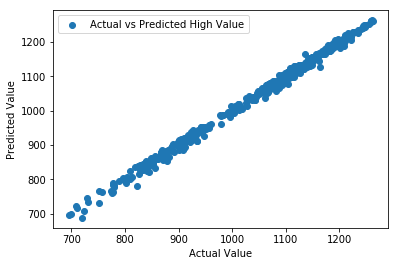

In [87]:
Data_New=X_Test_DataFrame.values
plt.scatter(Data_New[1:,1],Data_New[:514,4],label="Actual vs Predicted High Value")
plt.ylabel("Predicted Value")
plt.xlabel("Actual Value")
plt.legend()